In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Read data from dataset

In [53]:
df = pd.read_csv('data.csv')

In [54]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## drop id column

In [55]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [56]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# drop the dignosis coloumn to make it unsuprevised learning

In [57]:
X = df.drop('diagnosis', axis=1)
## map diagnosis to 1 and 0
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [58]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## normlize the data 

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)
X_std

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

# implement PCA from scratsh

In [60]:
class PCA_me:
    def __init__(self, n_components):
        self.n_components = n_components
        self.component = None
        self.mean = None

    def fit(self, x):
        #mean of the data
        self.mean = np.mean(x, axis=0)
        #covariance of data
        x = x - self.mean
        cov = np.cov(x.T)
        #eigen values and eigen vectors 
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        #eigenvectors is a coloumn vector
        eigenvectors = eigenvectors.T
        #sort the eigen values and eigen vectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        #store the first n eigen vectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, x):
        x = x - self.mean
        return np.dot(x, self.components.T)



# implement k means from scratsh 

In [61]:
class KMeans_me:

    def __init__(self, k=5, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        # list of lists containing the points belonging to each cluster
        self.clusters = [[] for _ in range(self.k)]
        # the centers of the clusters
        self.centroids = []

    def fit(self, x):
        self.x = x
        self.n_samples, self.n_features = x.shape
        #initialize the centroids
        random_sample_idx = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.x[idx] for idx in random_sample_idx]
        #optimization
        for _ in range(self.max_iters):
            #update the clusters
            self.clusters = self._create_clusters(self.centroids)
            #update the centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            #check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
     

        return self._get_cluster_labels(self.clusters)

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for idx, cluster in enumerate(clusters):
            if len(cluster) > 0:
                cluster_mean = np.mean(self.x[cluster], axis=0)
                centroids[idx] = cluster_mean
            else:
                # If the cluster is empty, assign a random point as the centroid
                random_idx = np.random.choice(self.n_samples)
                centroids[idx] = self.x[random_idx]
        return centroids

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.x):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _is_converged(self, centroids_old, centroids):
        distances = [self._euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _closest_centroid(self, sample, centroids):
        distances = [self._euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))
    

    def compute_sse(self):
        sse = 0
        for idx, cluster in enumerate(self.clusters):
            centroid = self.centroids[idx]
            for sample_idx in cluster:
                sample = self.x[sample_idx]
                sse += self._euclidean_distance(sample, centroid)**2
        return sse



# test k means without pca(cluster only)

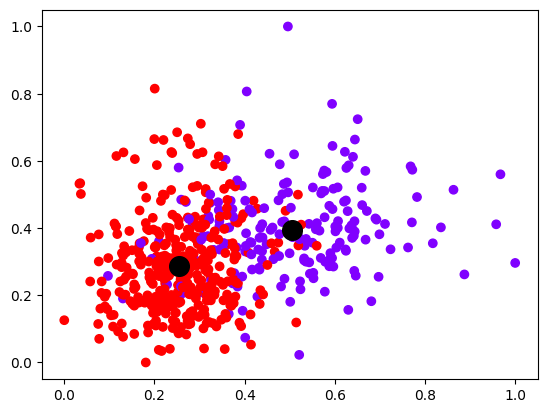

In [62]:
kmeans=KMeans_me(k=2)
label=kmeans.fit(X_std)
centroids=kmeans.centroids
plt.scatter(X_std[:,0],X_std[:,1],c=label,cmap='rainbow')
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=200,alpha=1)
plt.show()

## test kmeans and pca (clustring after pca)

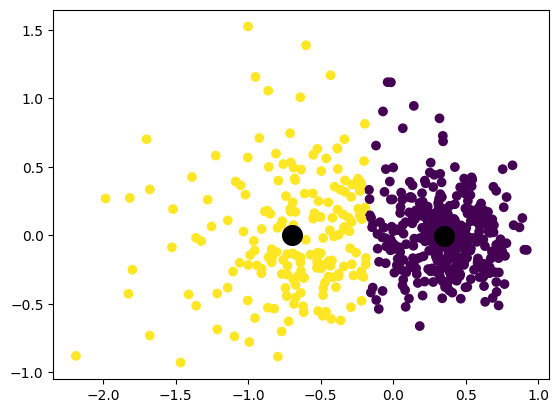

In [63]:
pca = PCA_me(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
kmeans = KMeans_me(k=2)
labels=kmeans.fit(X_pca)
centroids=kmeans.centroids
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=1)
plt.show()

# implement elbow function 

In [64]:
def elbow_method(X, max_k=10):
    sse = []
    for k in range(1, max_k):
        kmeans = KMeans_me(k=k, max_iters=300)
        kmeans.fit(X)
        sse.append(kmeans.compute_sse())
    return sse

# Plot SSE for different k values using elbow function


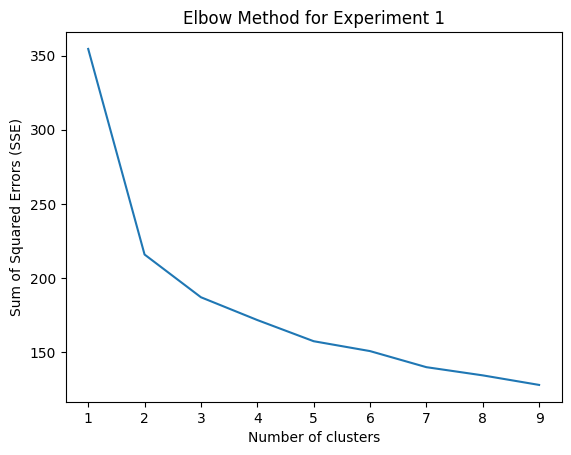

In [65]:
sse_values = elbow_method(X_std)
plt.plot(range(1, len(sse_values) + 1), sse_values)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Experiment 1')
plt.show()

# Apply the elbow method to find the best k clusters after PCA


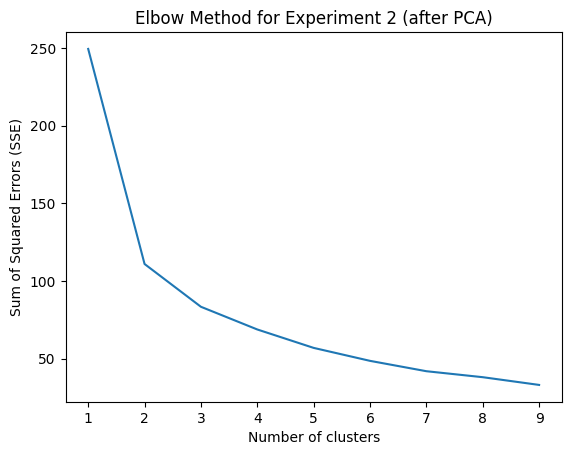

In [66]:
# Apply PCA
pca = PCA_me(n_components=2)  
pca.fit(X_std)
X_pca = pca.transform(X_std)

sse_values_pca = elbow_method(X_pca)
plt.plot(range(1, len(sse_values_pca) + 1), sse_values_pca)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Experiment 2 (after PCA)')

plt.show()

## choose the best k from the elbow graph


In [67]:
best_k_exp1 = 2
best_k_exp2 = 2

print(f"Best K for Experiment 1: {best_k_exp1}")
print(f"sum of squared errors for Experiment 1: {sse_values[best_k_exp1 - 1]}")
print(f"Best K for Experiment 2 (after PCA): {best_k_exp2}")
print(f"sum of squared errors for Experiment 2 (after PCA): {sse_values_pca[best_k_exp2 - 1]}")


Best K for Experiment 1: 2
sum of squared errors for Experiment 1: 215.83831972044857
Best K for Experiment 2 (after PCA): 2
sum of squared errors for Experiment 2 (after PCA): 110.971508783082


## apply different  Principal Components and visualize the clusters


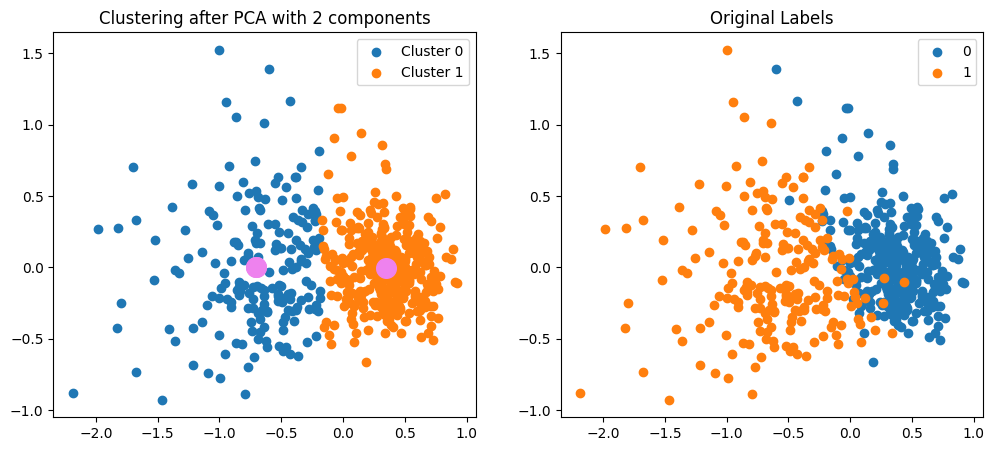

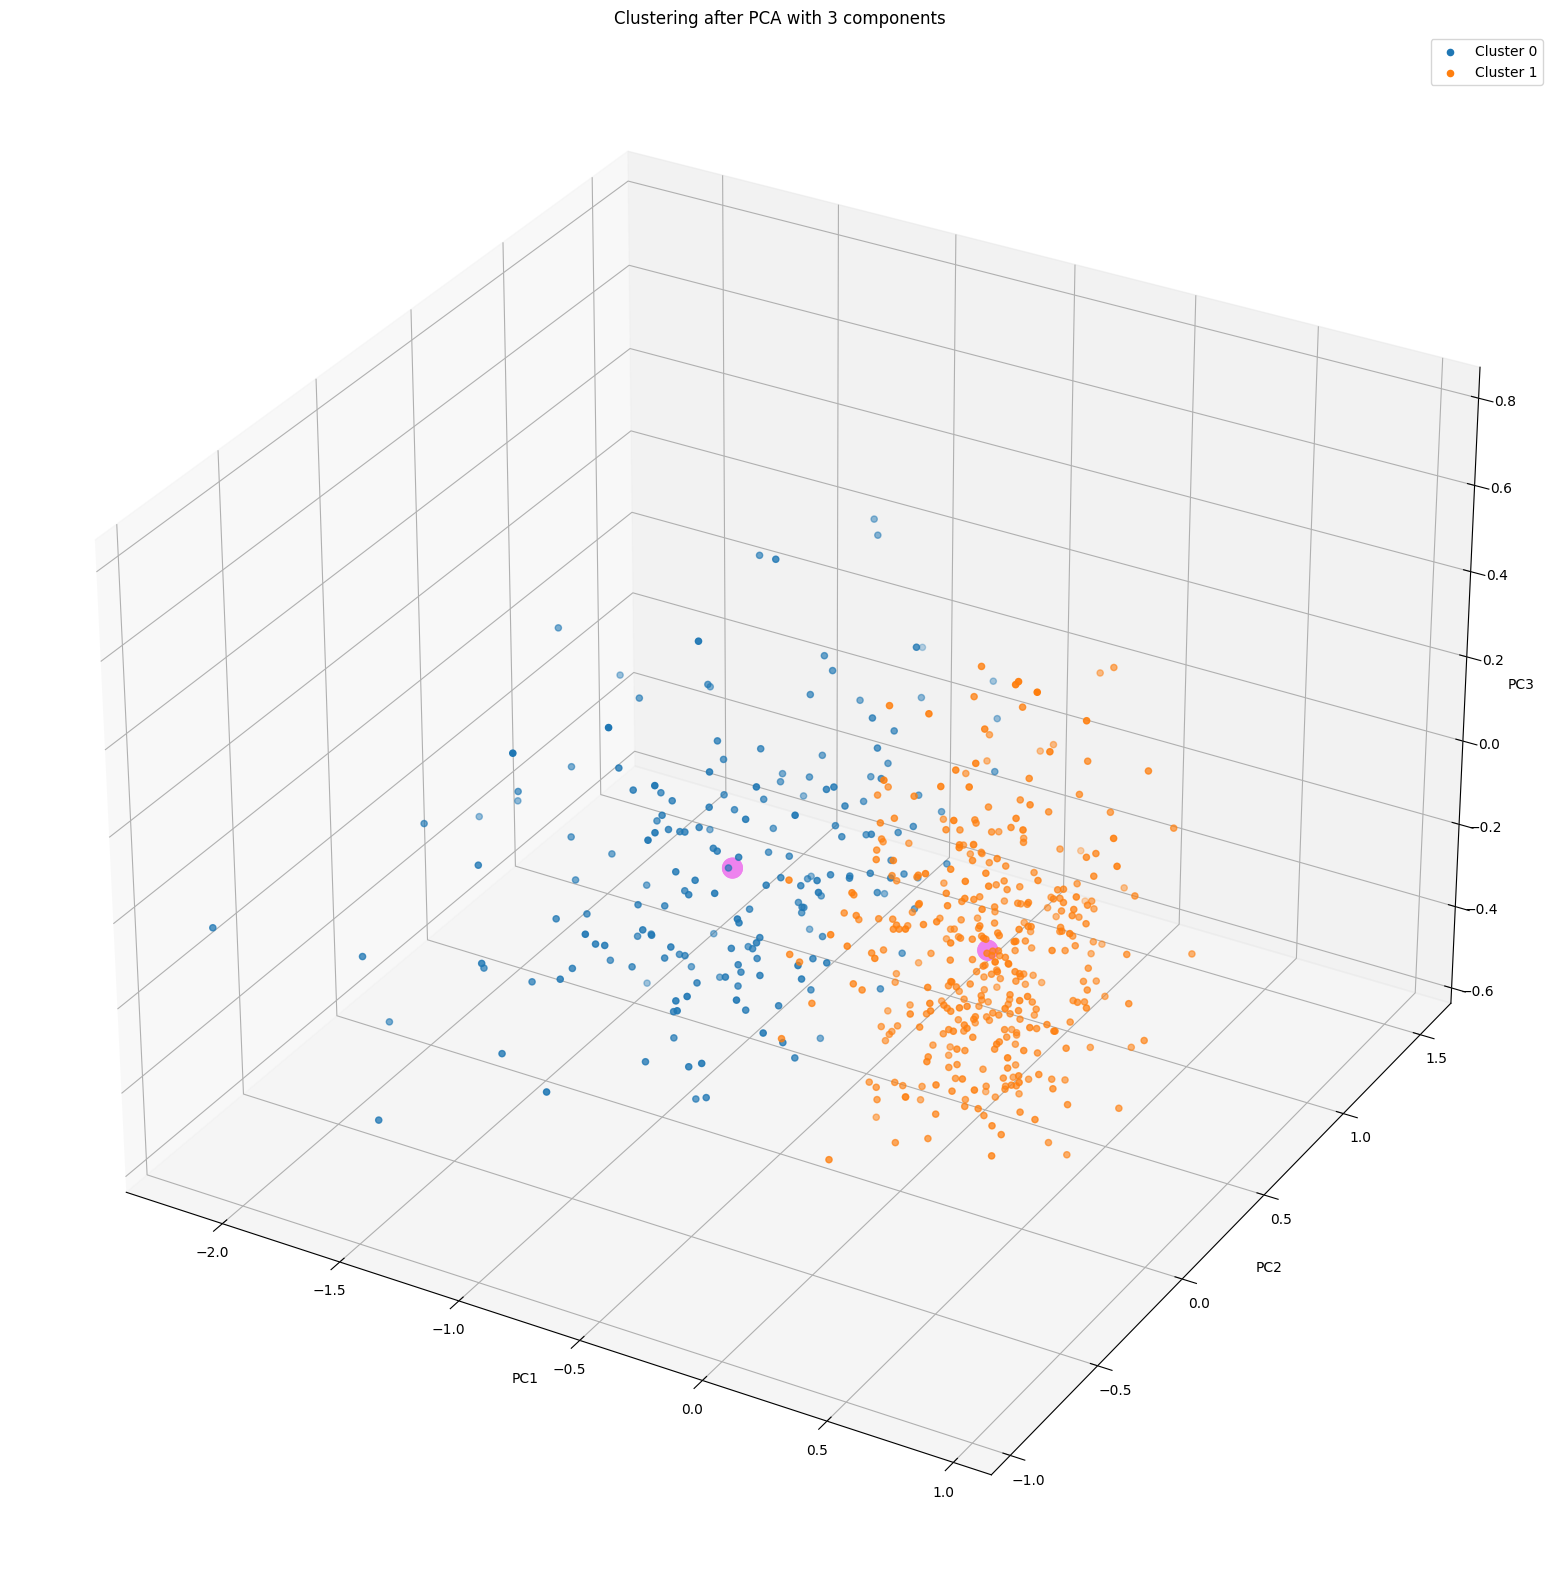

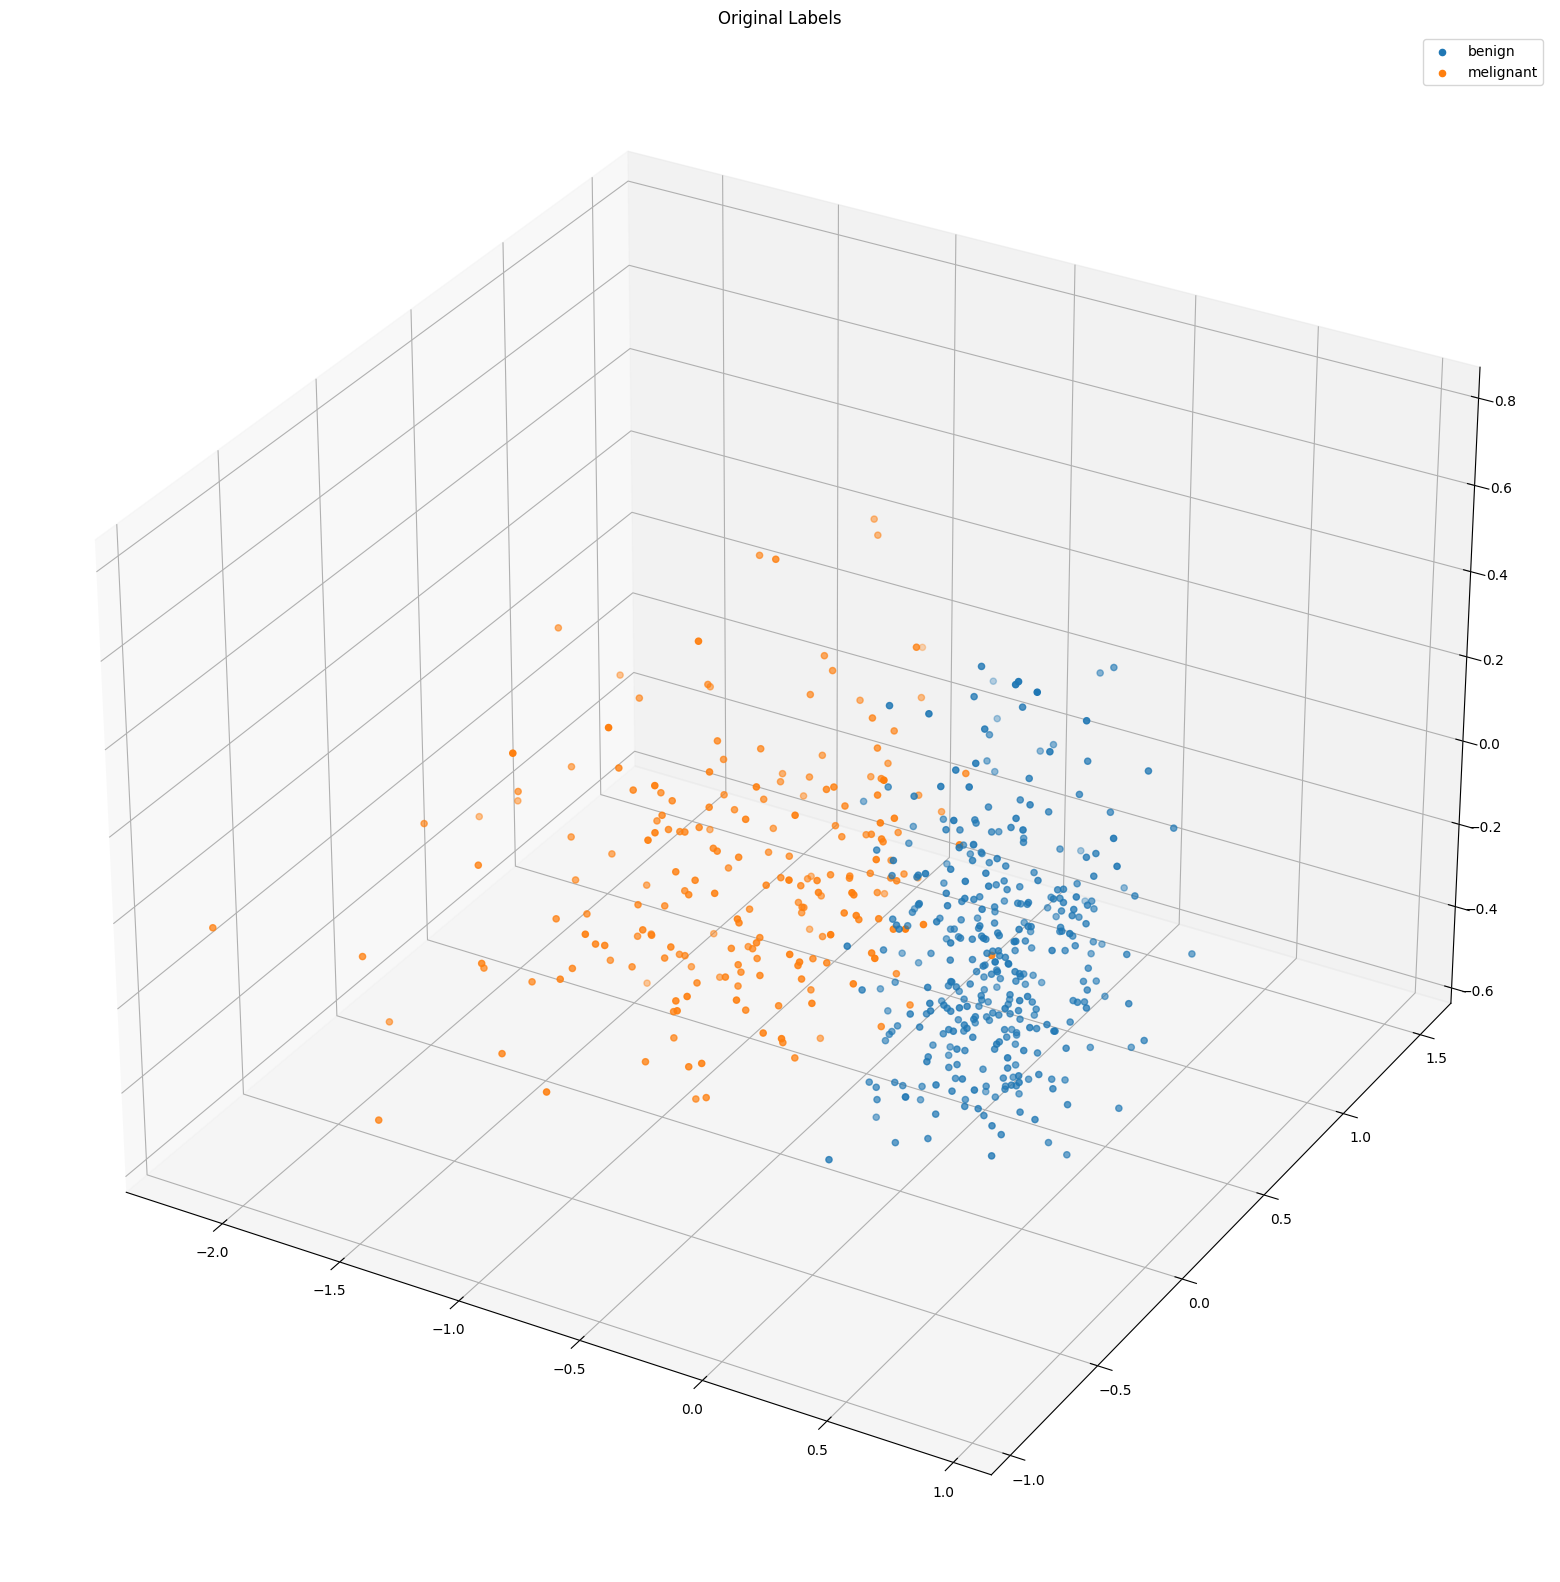

In [68]:
#visualize  for pca using principal components od 2 in 2d dimension
# Apply PCA
pca = PCA_me(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# Apply KMeans
kmeans = KMeans_me(k=best_k_exp1) 
labels = kmeans.fit(X_pca)
centroids = kmeans.centroids

# Visualization - Compare with original labels
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize clusters after PCA
for i in range(best_k_exp1):
    cluster_points = X_pca[np.where(labels == i)]
    axs[0].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
    axs[0].scatter(centroids[:, 0], centroids[:, 1], c='violet', s=200, alpha=1)
    axs[0].set_title(f'Clustering after PCA with {2} components')
    axs[0].legend()
for i in range(2):
    target = X_pca[np.where(y == i)]
    axs[1].scatter(target[:, 0], target[:, 1], label=f'{i}')
    axs[1].set_title(f'Original Labels')
    axs[1].legend()
plt.show()

#visualize for pca using principal components of 3 in 3d dimension
pca = PCA_me(n_components=3)
pca.fit(X_std)
X_pca = pca.transform(X_std)
kmeans = KMeans_me(k=best_k_exp1) 
labels = kmeans.fit(X_pca)
centroids = kmeans.centroids
fig = plt.figure(figsize=(20,20))
# Visualization in 3D
ax = fig.add_subplot(111, projection='3d')
for i in range(best_k_exp1):
    cluster_points = X_pca[np.where(labels == i)]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='violet', s=200, alpha=1)
    ax.set_title(f'Clustering after PCA with {3} components')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
plt.show()
# visualize target values 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
for i in range(2):
    target = X_pca[np.where(y == i)]
    ax.scatter(target[:, 0], target[:,1],target[:,2],label=f'melignant'if i==1 else 'benign')
    ax.set_title(f'Original Labels')
    ax.legend()
plt.show()



## make sure using sklearn built in function 

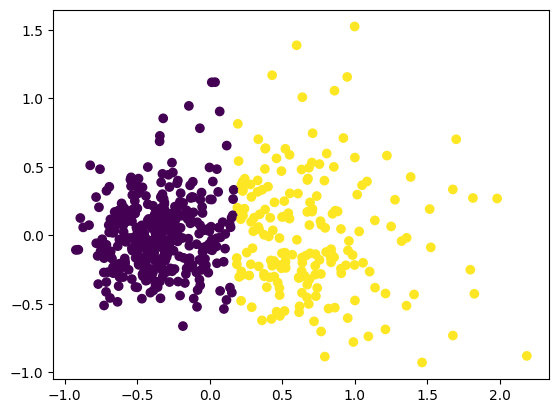

In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()


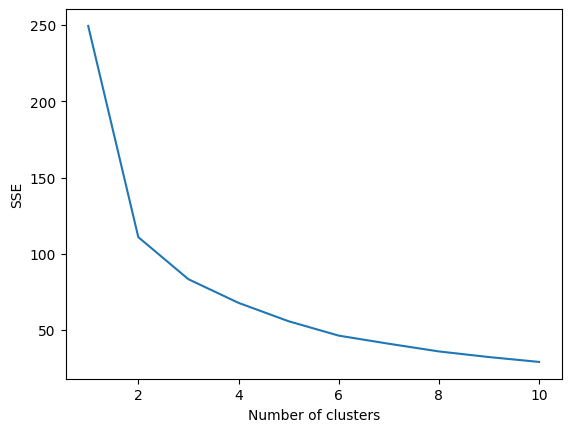

In [70]:
# use the elbow method to find the best number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
    

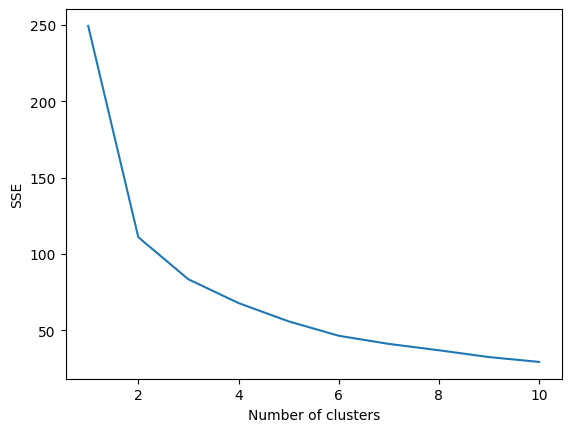

In [71]:
# elbow method after PCA
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


# Experiment 1: K-Means Clustering on Original Data

1.Initial Data Exploration:
   - The dataset contains information related to breast cancer diagnosis, with features representing various characteristics of cell nuclei.
   - The 'diagnosis' column was transformed into binary labels (Malignant - 1, Benign - 0).

2.Scaling and Standardization:
   - Feature scaling was performed using Min-Max scaling to ensure uniform scales across all features.

3.K-Means Clustering:
   - The custom K-Means implementation was applied to the standardized data.
   - Visualized the clustering results and centroids on a scatter plot.

4.Elbow Method - Experiment 1:
   - Employed the elbow method to determine the optimal number of clusters.
   - SSE values were plotted against different values of k.
   - Concluded that the elbow point was at k=2, suggesting that there are two distinct clusters in the original data.

# Experiment 2: K-Means Clustering After PCA

1.Principal Component Analysis (PCA):
   - Applied PCA to reduce the dimensionality of the data to two principal components.
   - Examined the explained variance ratio to understand the contribution of each principal component.

2.K-Means Clustering After PCA:
   - Utilized the custom PCA and K-Means implementations on the reduced-dimensional data.
   - Visualized the clustering results and centroids on a scatter plot.

3.Elbow Method - Experiment 2 (after PCA):
   - Applied the elbow method to find the optimal number of clusters after PCA.
   - SSE values were plotted against different values of k.
   - Concluded that the elbow point was still at k=2, indicating that the two principal components captured the primary structure of the data also conclude that pca doesn't affect choosing k for k means .

4.Comparison with Scikit-learn:
   - Performed the same analysis using scikit-learn's PCA and KMeans for validation.
   - The results obtained from the custom implementations were consistent with scikit-learn, confirming the accuracy of the custom implementations.

# Analysis with Varying Values and Approaches

1.Exploring Different Numbers of Principal Components:
   - Conducted clustering for various numbers of principal components (2, 3).
   - Visualized how the clustering results change as the number of principal components increases.
   - Concluded that even with a reduced number of components, the clustering results remained consistent.

2.Comparison with Original Labels:
   - Visualized the clustering results alongside the original diagnosis labels.
   - The comparison illustrated how well the clustering aligned with the original classes.
   - we see that the clustering results are consistent with the original labels, indicating that the clusters are well-separated.  

3.Insights from Elbow Method Loop:
   - Explored the elbow method for different configurations, considering both the number of clusters and principal components.
   - Provided insights into the stability of the optimal number of clusters and its robustness across different dimensionalities.

# Overall Conclusions:

1.Optimal Clustering Configuration:
   - The optimal number of clusters for this dataset is 2, indicating a natural separation into two distinct groups.

2.Consistency Across Implementations:
   - The custom implementations of PCA and K-Means yielded consistent results with scikit-learn, validating the accuracy of the custom code.

3.Robustness of Clustering:
   - The clustering results were robust across varying numbers of principal components, suggesting that the inherent structure of the data was well-captured even with reduced dimensions.

4.Visualization and Interpretability:
   - Visualizations allowed for an intuitive understanding of how the data clusters, providing insights into potential groupings within the breast cancer dataset.